In [94]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [95]:
from tensorflow.examples.tutorials.mnist import input_data

In [96]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [97]:
x = tf.placeholder(tf.float32 , shape=[None , 784])
y = tf.placeholder(tf.float32 , shape=[None , 10])

In [98]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [99]:
c = tf.matmul(x, w) + b

In [100]:
cross_entr = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y , logits=c))

In [101]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = opt.minimize(cross_entr)

In [102]:
init = tf.global_variables_initializer()

In [103]:
with tf.Session() as sess:
    sess.run(init)
    
    for steps in range(100):
        batchX , batchY = mnist.train.next_batch(batch_size=100)
        sess.run(train , feed_dict={x:batchX , y:batchY})

    corr = tf.equal(tf.argmax(y, 1), tf.argmax(c, 1))
    accuracy = tf.reduce_mean(tf.cast(corr , tf.float32))
    print(sess.run(accuracy ,feed_dict={x:mnist.test.images , y:mnist.test.labels}))
    w_ , b_ = sess.run([w , b])
sess.close()

0.8947


In [ ]:
def Predict(N):
    sess = tf.InteractiveSession()
    z = sess.run(tf.matmul(mnist.test.images[N].reshape((1 , 784)), w_) + b_)
    return "It's " + str(np.argmax(z))

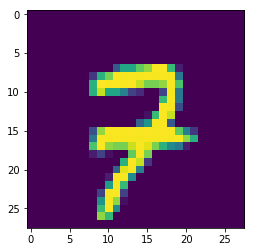

In [130]:
plt.imshow(mnist.test.images[144].reshape((28 , 28)))

In [131]:
Predict(144)

"It's 7"